Going to be making predictions on the data using a random forest and coupling this with unsupervised learning to make a nice good old semi-supervised model!

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score 

In [42]:
df = pd.read_csv('train_hcp_H.csv', header = None)
columns = ['r1Cu', 'r1Co', 'r1Ni', 'r1Zn', 'r1Mg', 'r2Cu', 'r2Co', 'r2Ni', 'r2Zn', 'r2Mg', 'r3Cu', 'r3Co', 'r3Ni', 'r3Zn', 'r3Mg', 'delta_E']
df.columns = columns
df.shape

(62, 16)

In [43]:
X = df.drop(['delta_E'], axis=1)
y = df['delta_E']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# Random Forest model
# Running the model here
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, y_train)
predictions_RF = RF_reg.predict(X_test)
predictions2_RF = RF_reg.predict(X_train)

In [47]:
RMSE_test = mean_squared_error(y_test, predictions_RF, squared=False)
RMSE_train = mean_squared_error(y_train, predictions2_RF, squared=False)
Score_test = RF_reg.score(X_test, y_test)
Score_train = RF_reg.score(X_train, y_train)

In [48]:
print('RMSE test',RMSE_test)
print('RMSE train',RMSE_train)
print('Test score',Score_test)
print('Train score',Score_train)

RMSE test 0.059318916496418454
RMSE train 0.044133319309076505
Test score 0.9732090413428894
Train score 0.981784387482017


Okay lets make that new CSV file!

In [49]:
# Load the trained model

new_data = pd.read_csv('generated_train.csv')
new_data.drop(['Unnamed: 0'], axis=1, inplace=True)
new_data.head()

r1Cu  r1Co  r1Ni  r1Zn  r1Mg  r2Cu  r2Co  r2Ni  r2Zn  r2Mg  r3Cu  r3Co  \
0     0     0     0     1     2     0     0     0     1     2     0     0   
1     0     0     0     1     2     0     0     0     1     2     0     0   
2     0     0     0     1     2     0     0     0     1     2     0     1   
3     0     0     0     1     2     0     0     0     1     2     0     0   
4     0     0     0     1     2     0     0     0     1     2     1     0   

   r3Ni  r3Zn  r3Mg  
0     1     0     0  
1     0     0     1  
2     0     0     0  
3     0     1     0  
4     0     0     0

In [50]:
predictions = RF_reg.predict(new_data)

In [51]:
predictions_df = pd.DataFrame(predictions, columns=['PredictedTarget'])

# Concatenate the predictions dataframe with the original new_data dataframe
new_data_with_predictions = pd.concat([new_data, predictions_df], axis=1)

# Display the new dataframe with predictions
new_data_with_predictions.head(10)

r1Cu  r1Co  r1Ni  r1Zn  r1Mg  r2Cu  r2Co  r2Ni  r2Zn  r2Mg  r3Cu  r3Co  \
0     0     0     0     1     2     0     0     0     1     2     0     0   
1     0     0     0     1     2     0     0     0     1     2     0     0   
2     0     0     0     1     2     0     0     0     1     2     0     1   
3     0     0     0     1     2     0     0     0     1     2     0     0   
4     0     0     0     1     2     0     0     0     1     2     1     0   
5     0     0     0     1     2     0     0     1     0     2     0     0   
6     0     0     0     1     2     0     0     1     0     2     0     0   
7     0     0     0     1     2     0     0     1     0     2     0     1   
8     0     0     0     1     2     0     0     1     0     2     0     0   
9     0     0     0     1     2     0     0     1     0     2     1     0   

   r3Ni  r3Zn  r3Mg  PredictedTarget  
0     1     0     0         0.027542  
1     0     0     1         0.027417  
2     0     0     0         0.027542  
3     0     1     0         0.027542  
4     0     0     0         0.027331  
5     1     0     0         0.033093  
6     0     0     1         0.032967  
7     0     0     0         0.033093  
8     0     1     0         0.033093  
9     0     0     0         0.032914

In [57]:
df.describe()

r1Cu       r1Co       r1Ni       r1Zn       r1Mg       r2Cu  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.467742   0.645161   0.500000   0.709677   0.677419   1.435484   
std     0.783388   0.993368   0.882433   1.014438   0.988030   1.139758   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   2.000000   
max     3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   

            r2Co       r2Ni       r2Zn       r2Mg       r3Cu       r3Co  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.403226   0.467742   0.354839   0.338710   0.935484   0.016129   
std     0.756603   0.783388   0.748699   0.745336   0.247676   0.127000   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   1.000000   0.000000   
max     3.000000   3.000000   3.000000   3.000000   1.000000   1.000000   

            r3Ni       r3Zn       r3Mg    delta_E  
count  62.000000  62.000000  62.000000  62.000000  
mean    0.016129   0.016129   0.016129  -0.286929  
std     0.127000   0.127000   0.127000   0.338224  
min     0.000000   0.000000   0.000000  -0.762244  
25%     0.000000   0.000000   0.000000  -0.572277  
50%     0.000000   0.000000   0.000000  -0.320498  
75%     0.000000   0.000000   0.000000  -0.070290  
max     1.000000   1.000000   1.000000   0.466403

In [56]:
new_data_with_predictions.describe()

r1Cu         r1Co         r1Ni         r1Zn         r1Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.600000     0.600000     0.600000     0.600000     0.600000   
std       0.800065     0.800065     0.800065     0.800065     0.800065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

              r2Cu         r2Co         r2Ni         r2Zn         r2Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.600000     0.600000     0.600000     0.600000     0.600000   
std       0.800065     0.800065     0.800065     0.800065     0.800065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

              r3Cu         r3Co         r3Ni         r3Zn         r3Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.200000     0.200000     0.200000     0.200000     0.200000   
std       0.400033     0.400033     0.400033     0.400033     0.400033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       PredictedTarget  
count      6125.000000  
mean         -0.330703  
std           0.243084  
min          -0.693193  
25%          -0.540041  
50%          -0.368030  
75%          -0.185263  
max           0.423546

Lets continue on and see about making a unsupervised model out of this

In [60]:
#Alright, I believe that I should do a new split on the new CSV data
X = new_data_with_predictions.drop(['PredictedTarget'], axis=1)
y = new_data_with_predictions['PredictedTarget']

In [74]:
X.describe()

r1Cu         r1Co         r1Ni         r1Zn         r1Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.600000     0.600000     0.600000     0.600000     0.600000   
std       0.800065     0.800065     0.800065     0.800065     0.800065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

              r2Cu         r2Co         r2Ni         r2Zn         r2Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.600000     0.600000     0.600000     0.600000     0.600000   
std       0.800065     0.800065     0.800065     0.800065     0.800065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

              r3Cu         r3Co         r3Ni         r3Zn         r3Mg  
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000  
mean      0.200000     0.200000     0.200000     0.200000     0.200000  
std       0.400033     0.400033     0.400033     0.400033     0.400033  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
#First we gotta reduce the dimensionality of the data!
#Using tSNE here
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=-1)
X_tsne = tsne.fit_transform(X_train)

In [64]:
#Maybe we can also check out PCA?
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X_train)

(4900, 2)

In [63]:
X_tsne.shape

(4900, 2)

In [65]:
X_pca.shape

(4900, 2)

Okay now to plot these:)

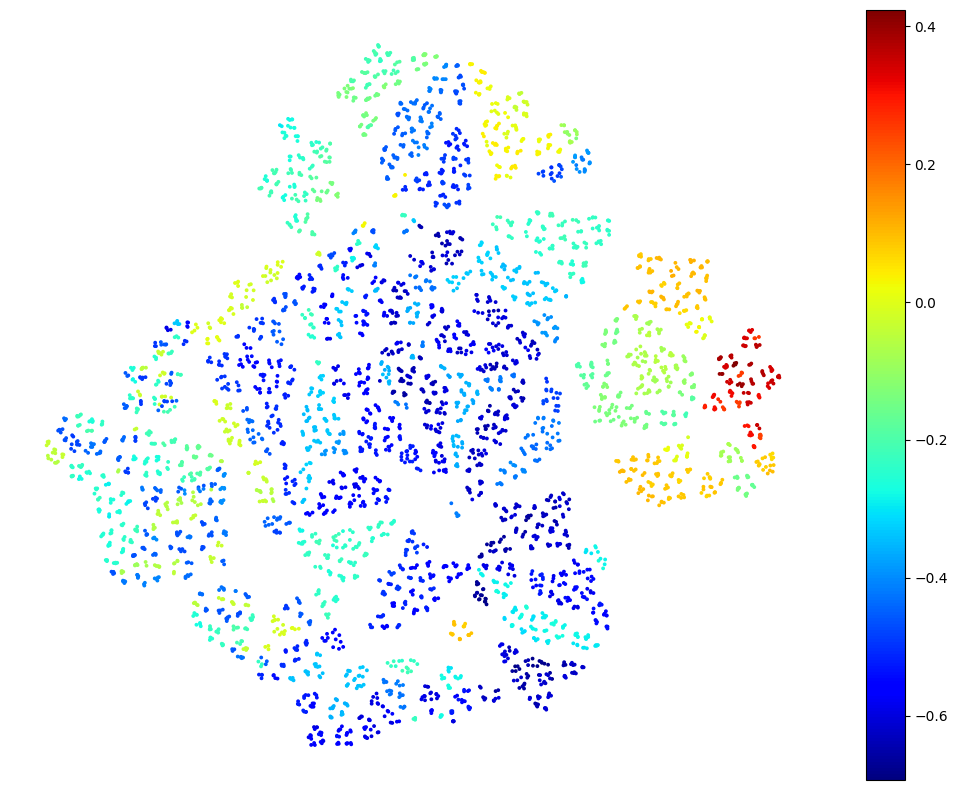

In [84]:
#t-SNE plot
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y_train, s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

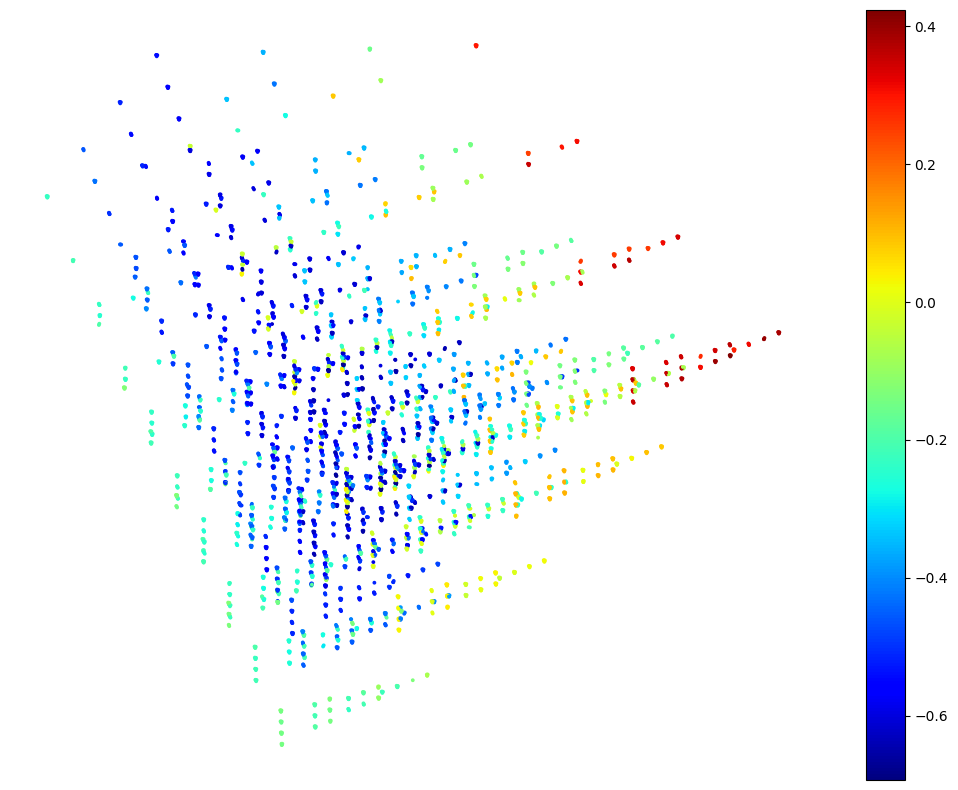

In [81]:
#PCA plot
plt.figure(figsize=(13,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=y_train, s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [173]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=20, random_state=42) 
kmeans.fit(X_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=42)

In [174]:
y_pred_unsup=kmeans.predict(X_tsne)
y_pred_unsup

array([13, 19,  5, ..., 11, 13,  7], dtype=int32)

In [71]:
def plot_clusters(X, y=None):
  plt.scatter(X[:,0],X[:,1], c=y, s=1)

In [72]:
def plot_centroids(centroids):
  plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8, 
              color='w', zorder=10, alpha=0.5)
  plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=50, linewidths=5, 
              color='k', zorder=11, alpha=0.8)

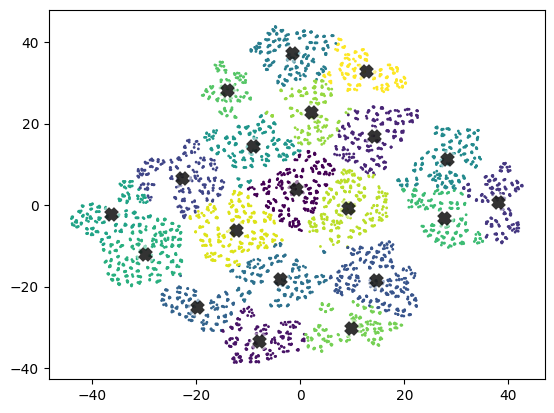

In [175]:
plot_clusters(X_tsne, y_pred_unsup)
plot_centroids(kmeans.cluster_centers_)

In [176]:
kmeans.inertia_

168958.78125

In [178]:
silhouette_score(X_tsne, kmeans.labels_)

0.3768351

In [146]:
kmeans15 = KMeans(n_clusters=15, random_state=42) 
kmeans15.fit(X_tsne)

kmeans14= KMeans(n_clusters=14, random_state=42) 
kmeans14.fit(X_tsne)

kmeans13= KMeans(n_clusters=13, random_state=42) 
kmeans13.fit(X_tsne)

kmeans12= KMeans(n_clusters=12, random_state=42) 
kmeans12.fit(X_tsne)

kmeans11= KMeans(n_clusters=11, random_state=42) 
kmeans11.fit(X_tsne)

kmeans10 = KMeans(n_clusters=10, random_state=42) 
kmeans10.fit(X_tsne)

kmeans9= KMeans(n_clusters=9, random_state=42) 
kmeans9.fit(X_tsne)

kmeans8= KMeans(n_clusters=8, random_state=42) 
kmeans8.fit(X_tsne)

kmeans7= KMeans(n_clusters=7, random_state=42) 
kmeans7.fit(X_tsne)

kmeans6= KMeans(n_clusters=6, random_state=42) 
kmeans6.fit(X_tsne)

kmeans5 = KMeans(n_clusters=5, random_state=42) 
kmeans5.fit(X_tsne)

kmeans4= KMeans(n_clusters=4, random_state=42) 
kmeans4.fit(X_tsne)

kmeans3= KMeans(n_clusters=3, random_state=42) 
kmeans3.fit(X_tsne)

kmeans2= KMeans(n_clusters=2, random_state=42) 
kmeans2.fit(X_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KMeans(n_clusters=2, random_state=42)

In [147]:
y_pred_unsup15=kmeans15.predict(X_tsne)
y_pred_unsup15

y_pred_unsup14=kmeans14.predict(X_tsne)
y_pred_unsup14

y_pred_unsup13=kmeans13.predict(X_tsne)
y_pred_unsup13

y_pred_unsup12=kmeans12.predict(X_tsne)
y_pred_unsup12

y_pred_unsup11=kmeans11.predict(X_tsne)
y_pred_unsup11

y_pred_unsup10=kmeans10.predict(X_tsne)
y_pred_unsup10

y_pred_unsup9=kmeans9.predict(X_tsne)
y_pred_unsup9

y_pred_unsup8=kmeans8.predict(X_tsne)
y_pred_unsup8

y_pred_unsup7=kmeans7.predict(X_tsne)
y_pred_unsup7

y_pred_unsup6=kmeans6.predict(X_tsne)
y_pred_unsup6

y_pred_unsup5=kmeans5.predict(X_tsne)
y_pred_unsup5

y_pred_unsup4=kmeans4.predict(X_tsne)
y_pred_unsup4

y_pred_unsup3=kmeans3.predict(X_tsne)
y_pred_unsup3

y_pred_unsup2=kmeans2.predict(X_tsne)
y_pred_unsup2

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [148]:
kmeans_per_k = [kmeans2, kmeans3, kmeans4, kmeans5, kmeans6, kmeans7, kmeans8, kmeans9, kmeans10, kmeans11, kmeans12, kmeans13, kmeans14, kmeans15]
kmeans_per_k

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42)]

In [149]:
#Calculate inertia for each cluster 
inertias_per_k =[model.inertia_ for model in kmeans_per_k]
inertias_per_k

[2162798.0,
 1382618.75,
 948857.875,
 737421.875,
 602363.75,
 512858.0,
 442812.21875,
 389457.03125,
 351873.09375,
 322656.28125,
 294662.3125,
 270683.875,
 250267.546875,
 234223.390625]

Text(0.5, 1.0, 'Inertia vs k')

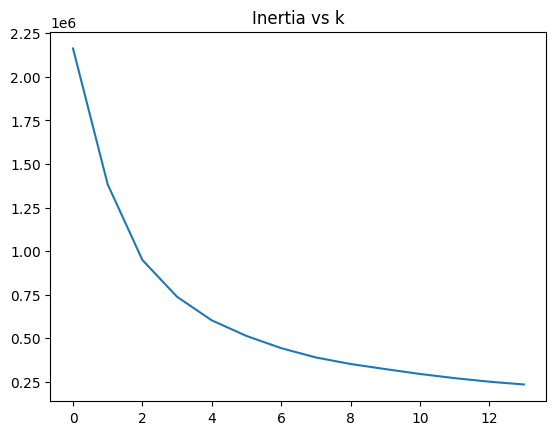

In [150]:
plt.plot(inertias_per_k)
plt.title("Inertia vs k")

In [151]:
silhouette_per_k =[silhouette_score(X_tsne, model.labels_) for model in kmeans_per_k]
silhouette_per_k

[0.38199893,
 0.39773417,
 0.4070205,
 0.41800886,
 0.4130904,
 0.41117242,
 0.395879,
 0.40635288,
 0.4028247,
 0.3852574,
 0.37270093,
 0.3753987,
 0.37725183,
 0.37348402]

In [155]:
len(inertias_per_k)

14

Text(0.5, 1.0, 'Silhouette vs k')

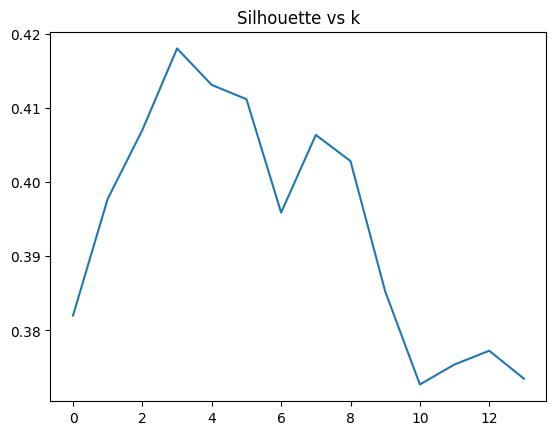

In [159]:
plt.plot(silhouette_per_k)
plt.title("Silhouette vs k")

In [82]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [165]:
dbscan = DBSCAN(eps=0.25,min_samples=5)#note the eps value 
dbscan.fit(X_tsne)

DBSCAN(eps=0.25)

In [166]:
dbscan.labels_[:50]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, 17, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, 48, -1, -1, 15, -1, -1, -1])

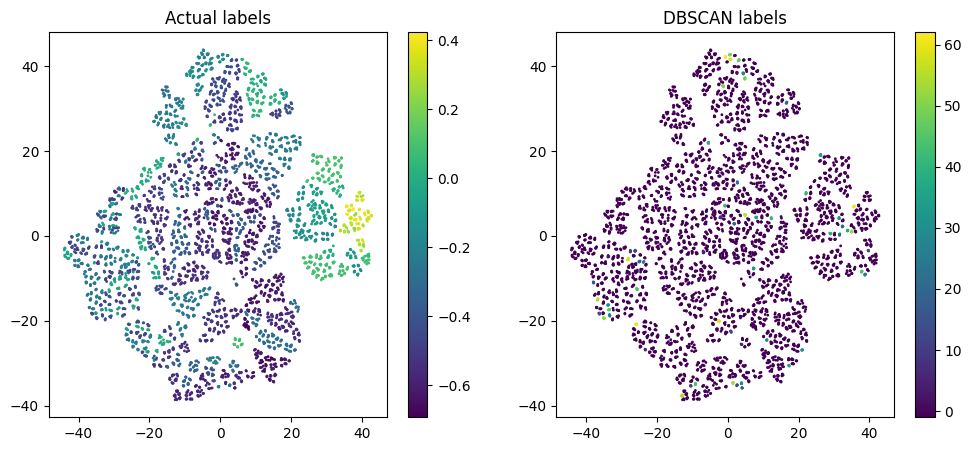

In [167]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_train,s=1)
plt.title("Actual labels")
plt.colorbar()

plt.subplot(1, 2,2)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dbscan.labels_,s=1)
plt.title("DBSCAN labels")
plt.colorbar()

plt.show()

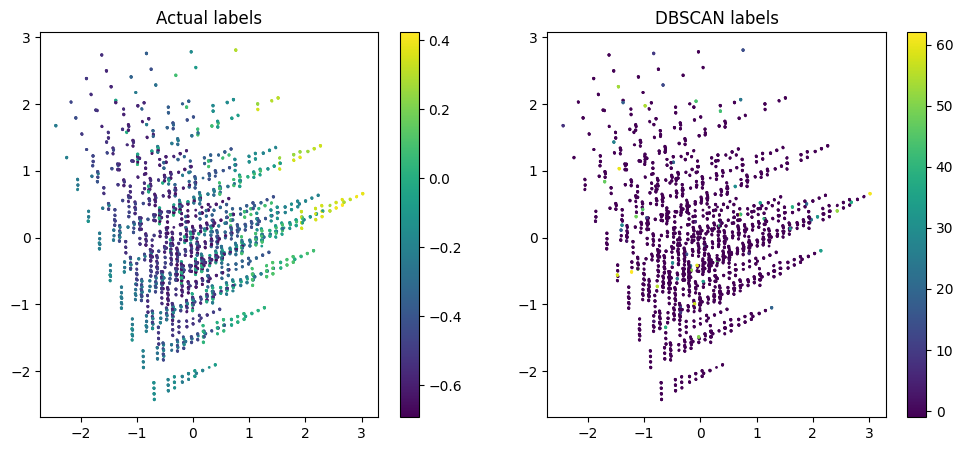

In [168]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train,s=1)
plt.title("Actual labels")
plt.colorbar()

plt.subplot(1, 2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dbscan.labels_,s=1)
plt.title("DBSCAN labels")
plt.colorbar()

plt.show()

In [171]:
labels = dbscan.labels_
silhouette = silhouette_score(X_tsne, labels)

In [172]:
print(silhouette)

-0.72597873
